# Predicting Economies Using World Bank Datasets

Sean McSkeane, Albert Chu, Sonny Liu

### Table of Contents

1. Background
    1.1 Introduction
    1.2 Defintions
2. Data Collection
    2.1 Libraries
    2.2 Data
3. Data Processing
    3.1
4. Exploratory Analysis and Data Visualization
5. Analysis, Hypothesis Testing, and Machine Learning
6. Insight and Policy Design
    6.1 Conclusion

### Introduction

The are almost innumerable factors that determine the economic prosperity of a country. This project aims to analyze the effect that some of these factors have on the economies of countries around the world. The variables that will be analyzed will include both variables that seem directly related to economics and variables that seem loosely related to economics.

### Definitions

Should define some of the terms we will be using GDP.

## <center>Data Collection<center>

### Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import model_selection
from statsmodels import api as sm
!pip install folium
import folium
import json
from pandas.io.json import json_normalize

    100% |████████████████████████████████| 92kB 771kB/s ta 0:00:01


For the purposes of this project, we used data from the World Bank dataset. The World Bank site allowed for us to build a custom dataset by choosing the variables that we wanted. We chose to include variables that we thought could be used a predictors of GDP. We purposely chose more variables than we planned on using as we were unsure of the quality of the data, and which variables were missing values.

In [3]:
worldBankDevInc = pd.read_csv("WorldBankData/data.csv")
worldCountries = pd.read_json("world-countries.json")

worldBankDevInc.dropna(inplace=True)
countryName = ""
first = True
newRows = []
countriesData = []

for index, row in worldBankDevInc.iterrows():
    if (countryName != row["Country Name"]):
        if (first == False):
            #CHOSE WHAT YEARS TO DROP HERE
            df = df.drop(df.loc[:, '1960 [YR1960]':'1990 [YR1990]'].columns, axis = 1)  
            countriesData.append(df)
            # IF YOU WANT TO SEE ALL COUNTRIES DATA UNCOMMENT THIS
            #with pd.option_context('display.max_rows', None, 'display.max_columns', None):
                #display(df)
        countryName = row["Country Name"]
        df = pd.DataFrame(columns=worldBankDevInc.columns) 
        first = False
        
    df = df.append(row, ignore_index=True)

df  = df.drop(df.loc[:, '1960 [YR1960]':'1990 [YR1990]'].columns, axis = 1) 
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    #display(df)
    #display(countriesData[206])

## <center>Data Processing<center>

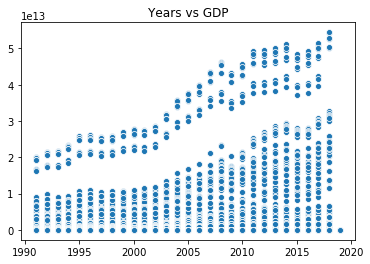

In [4]:
worldData = pd.concat(countriesData)
years = []
GDP = []
counter = 0
year = 1991

for column in worldData:
    if column == str(year) + " [YR" + str(year) + "]":
        GDP += worldData[column].tolist()
        for x in range(7890):
            years.append(year)
        year += 1

for x in range(len(GDP)):
    if GDP[x] == "..":
        GDP[x] = 0

# for x in range(1000):
#     print(GDP[x])
    
# print(len(GDP))
# print(len(years))

scatterPlot = sns.scatterplot(x=years, y=GDP).set_title('Years vs GDP')

In [ ]:
worldData

In [5]:
worldData = worldData[["Country Name","Country Code", "Series Name", "Series Code", "2015 [YR2015]"]]

counter = 0
indx = 0
predictors = pd.DataFrame(columns = ["countryName", "Country Code"])
for index, row in worldData.iterrows():
    if row["Country Name"] not in predictors.countryName.values:
        predictors = predictors.append({"countryName": row["Country Name"], "Country Code": row["Country Code"]}, ignore_index=True)
predictors["Current health expenditure (% of GDP)"] = 0.0
predictors["Government expenditure on education, total (% of GDP)"] = 0.0
predictors["Prevalence of undernourishment (% of population)"] = 0.0
predictors["GDP per capita (current US$)"] = 0.0
for index, row in worldData.iterrows():
    if row["Series Name"] in predictors.columns:
        counter += 1
        if row["2015 [YR2015]"] != "..":
            predictors.at[indx, row["Series Name"]] = row["2015 [YR2015]"]
        else:
            predictors.at[indx, row["Series Name"]] = np.nan
        if counter % 4 == 0:
            counter = 0
            indx += 1
predictors = predictors.dropna()

## <center>Exploratory Analysis and Data Visualization<center>

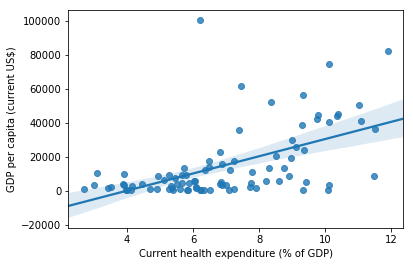

In [6]:
sns.regplot(x="Current health expenditure (% of GDP)", y="GDP per capita (current US$)", data=predictors)

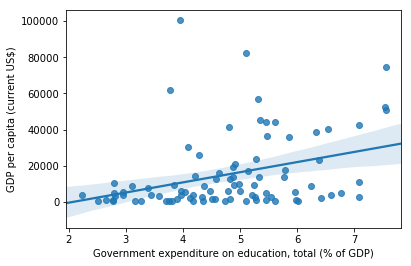

In [7]:
sns.regplot(x="Government expenditure on education, total (% of GDP)", y="GDP per capita (current US$)", data=predictors)

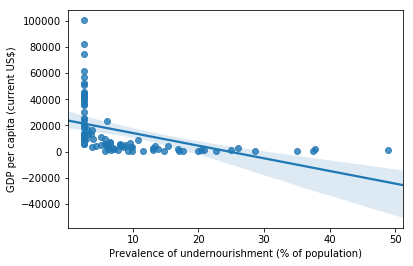

In [8]:
sns.regplot(x="Prevalence of undernourishment (% of population)", y="GDP per capita (current US$)", data=predictors)

In [18]:


mapPredictors = predictors

#for index, row in mapPredictors.iterrows():
#    if row["countryName"] not in worldCountries.name:
#        mapPredictors.drop([index], axis=0, inplace=True)

worldCountries.head()

,type,features
0,FeatureCollection,"{'type': 'Feature', 'properties': {'name': 'Af..."
1,FeatureCollection,"{'type': 'Feature', 'properties': {'name': 'An..."
2,FeatureCollection,"{'type': 'Feature', 'properties': {'name': 'Al..."
3,FeatureCollection,"{'type': 'Feature', 'properties': {'name': 'Un..."
4,FeatureCollection,"{'type': 'Feature', 'properties': {'name': 'Ar..."


In [9]:
#worldCountries 

# NEED COUNTRIES IN dataGDP to match countries in worldCountries.

m = folium.Map(location=[37, -102], zoom_start=5)

#folium.Choropleth(
#    geo_data="world-countries.json",
#    name='choropleth',
#    data=dataGDP,
#    columns=['Country Name', 'GDP2015'],
#    key_on='feature.id',
#    fill_color='YlGn',
#    fill_opacity=0.7,
#    line_opacity=0.2,
#    legend_name='Unemployment Rate (%)'
#).add_to(m)

folium.LayerControl().add_to(m)

m

## <center>Analysis, Hypothesis Testing, and Machine Learning<center>

### Linear Regression

In [10]:
X = predictors[["Current health expenditure (% of GDP)", "Government expenditure on education, total (% of GDP)", "Prevalence of undernourishment (% of population)"]]
y = predictors[["GDP per capita (current US$)"]]
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
lm.score(X,y)

0.37793092179698706

### OLS Regression

In [11]:
ols_y = y
ols_X = X

#add a constant to the features
ols_X = sm.add_constant(ols_X)

# use Ordinary Least Squares
OLS_model = sm.OLS(ols_y, ols_X).fit()
OLS_model.summary()

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     GDP per capita (current US$)   R-squared:                       0.378
Model:                                      OLS   Adj. R-squared:                  0.356
Method:                           Least Squares   F-statistic:                     17.01
Date:                          Mon, 09 Dec 2019   Prob (F-statistic):           1.01e-08
Time:                                  21:35:56   Log-Likelihood:                -976.89
No. Observations:                            88   AIC:                             1962.
Df Residuals:                                84   BIC:                             1972.
Df Model:                                     3                                         
Covariance Type:                      nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                 -1.356e+04   8958.205     -1.514      0.134   -3.14e+04    4253.104
Current health expenditure (% of GDP)                  3848.7029    899.665      4.278      0.000    2059.621    5637.785
Government expenditure on education, total (% of GDP)  1474.7661   1554.043      0.949      0.345   -1615.619    4565.151
Prevalence of undernourishment (% of population)       -569.3289    206.849     -2.752      0.007    -980.671    -157.987
==============================================================================
Omnibus:                       62.764   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              340.490
Skew:                           2.233   Prob(JB):                     1.16e-74
Kurtosis:                      11.539   Cond. No.                         73.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Predictions

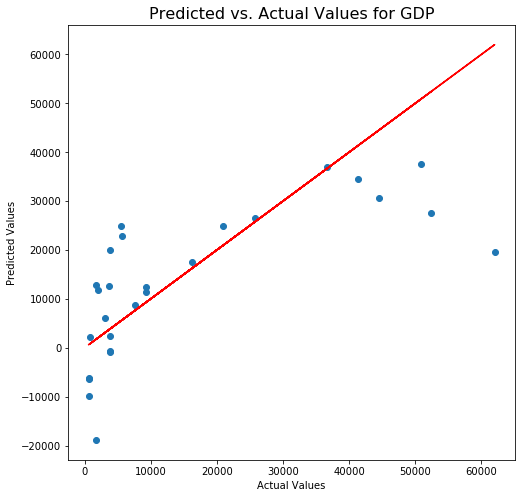

In [12]:
# create training and testing data from same X and y used in regression above
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

# create and fit the model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

# generate predictions for player Rating to compare with y_test data
predictions = lm.predict(X_test)

plt.figure(figsize=(8,8))
plt.title("Predicted vs. Actual Values for GDP", fontsize=16)
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, color="Red") # identity line y=x
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

## <center>Insight and Policy Decision<center>